In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
model_2_data = pd.read_csv('C:/Users/PC/Desktop/Moringa_Project1/dsc-phase-2-project/dsc-phase-2-project/data/kc_house_data_new.csv')

In [3]:
correlation_data = model_2_data.corr().abs()
unstacked_correlation_data = correlation_data.unstack()
srt_unstacked_correlation_data = unstacked_correlation_data.sort_values(ascending=False, kind='quicksort')

In [4]:
srt_unstacked_correlation_data.loc[(srt_unstacked_correlation_data != 1.0) & (srt_unstacked_correlation_data > .7)].head(20)

sqft_living    sqft_above       0.875918
sqft_above     sqft_living      0.875918
sqft_living    sqft_living15    0.756306
sqft_living15  sqft_living      0.756306
bathrooms      sqft_living      0.754232
sqft_living    bathrooms        0.754232
sqft_above     sqft_living15    0.731911
sqft_living15  sqft_above       0.731911
sqft_lot15     sqft_lot         0.718062
sqft_lot       sqft_lot15       0.718062
price          sqft_living      0.701032
sqft_living    price            0.701032
dtype: float64

In [5]:
# Assuming you want to work with the 'model_2_data' DataFrame
independent_data = model_2_data.copy()


In [6]:
# Assuming 'model_2_data' is your DataFrame
independent_data = model_2_data.drop(['price'], axis=1)
# Check for non-numeric columns and remove them
non_numeric_columns = independent_data.select_dtypes(exclude=['number']).columns
independent_data = independent_data.drop(non_numeric_columns, axis=1)
# Check for missing values and fill or remove them if necessary
independent_data = independent_data.dropna()
# Check for infinity values and replace them if necessary
independent_data = independent_data.replace([np.inf, -np.inf], np.nan).dropna()
# Ensure data types are numeric
independent_data = independent_data.astype('float64')
# Calculate VIF
vif = [variance_inflation_factor(independent_data.values, i) for i in range(independent_data.shape[1])]

In [7]:
model_2_data.drop(['sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

#### Create Dummy Variables for Seasons

In [8]:
## Bin 'month' column into seasons
labels = ['Winter', 'Spring', 'Summer', 'Fall', 'Winter']
model_2_data.month = pd.cut(model_2_data.month, bins=[0,2,5,8,11,12], labels=labels, ordered=False)

In [9]:
model_2_data.month.value_counts()

Spring    6477
Summer    6228
Fall      4981
Winter    3659
Name: month, dtype: int64

In [10]:
model_2_data.groupby('month')['price'].mean()

month
Fall      534774.019474
Spring    553939.696928
Summer    549788.509152
Winter    521619.608090
Name: price, dtype: float64

In [11]:
season_dummies = pd.get_dummies(model_2_data.month, prefix='Season')

In [12]:
## Reorder seasons based on chronology
## Exclude 'Season_Spring' to avoid the dummy variable trap
season_columns = list(season_dummies.columns)
season_columns = [season_columns[2]] + [season_columns[0]] + [season_columns[3]]
season_dummies = season_dummies[season_columns]

In [13]:
model_2_data = pd.concat([model_2_data, season_dummies], axis=1)

In [14]:
model_2_data.drop(['month'], axis=1, inplace=True)

#### Create Dummy Variables for Bedrooms

In [15]:
model_2_data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10], dtype=int64)

In [16]:
model_2_data.bedrooms.value_counts()

3     9715
4     6846
2     2708
5     1586
6      265
1      164
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [17]:
## Bin 'bedrooms' column
bedroom_labels = ['1', '2', '3', '4', '5', '6_up']
model_2_data.bedrooms = pd.cut(model_2_data.bedrooms, bins=[0,1,2,3,4,5,11], labels=bedroom_labels, ordered=True)

In [18]:
model_2_data.bedrooms.value_counts()

3       9715
4       6846
2       2708
5       1586
6_up     326
1        164
Name: bedrooms, dtype: int64

In [19]:
bedrooms_dummies = pd.get_dummies(model_2_data.bedrooms, prefix='Bedrooms', drop_first=True)

In [20]:
model_2_data = pd.concat([model_2_data, bedrooms_dummies], axis=1)
model_2_data.drop(['bedrooms'], axis=1, inplace=True)

#### Create Dummy Variables for Bathrooms

In [21]:
model_2_data.bathrooms = model_2_data.bathrooms.apply(np.floor)
model_2_data = model_2_data.astype({'bathrooms':'int'})

In [22]:
model_2_data.bathrooms.value_counts()

2    10478
1     8251
3     2217
4      335
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

In [23]:
## Bin 'bathrooms' column
bathroom_labels = ['1', '2', '3', '4', '5_up']
model_2_data.bathrooms = pd.cut(model_2_data.bathrooms, bins=[0,1,2,3,4,8], labels=bathroom_labels, ordered=True)

In [24]:
bathroom_dummies = pd.get_dummies(model_2_data.bathrooms, prefix='Bathrooms', drop_first=True)

In [25]:
model_2_data = pd.concat([model_2_data, bathroom_dummies], axis=1)
model_2_data.drop(['bathrooms'], axis=1, inplace=True)

#### Create Dummy Variables for Floors

In [26]:
model_2_data.floors = model_2_data.floors.apply(np.floor)
model_2_data = model_2_data.astype({'floors':'int'})

In [27]:
floor_dummies = pd.get_dummies(model_2_data.floors, prefix='Floors', drop_first=True)

In [28]:
model_2_data = pd.concat([model_2_data, floor_dummies], axis=1)
model_2_data.drop(['floors'], axis=1, inplace=True)

#### Create Dummy Variables for View

In [29]:
view_dummies = pd.get_dummies(model_2_data.view, prefix='View', drop_first=True)

In [30]:
model_2_data = pd.concat([model_2_data, view_dummies], axis=1)
model_2_data.drop(['view'], axis=1, inplace=True)

#### Create Dummy Variables for Condition

In [31]:
model_2_data.condition.unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [32]:
condition_dummies = pd.get_dummies(model_2_data.condition, prefix='Condition', drop_first=True)

In [33]:
model_2_data = pd.concat([model_2_data, condition_dummies], axis=1)
model_2_data.drop(['condition'], axis=1, inplace=True)

#### Create Dummy Variables for Grade

In [34]:
model_2_data.grade.value_counts()

7 Average        8871
8 Good           6040
9 Better         2606
6 Low Average    1968
10 Very Good     1130
11 Excellent      396
5 Fair            219
12 Luxury          88
4 Low              14
13 Mansion         13
Name: grade, dtype: int64

In [35]:
model_2_data['grade'] = pd.to_numeric(model_2_data['grade'], errors='coerce')
## Bin 'grade' column
grade_labels = ['Average', 'Above_Average', 'High_Quality']
model_2_data.grade = pd.cut(model_2_data.grade, bins=[4,7,9,12], labels=grade_labels, ordered=True)

In [36]:
grade_dummies = pd.get_dummies(model_2_data.grade, prefix='Grade', drop_first=True)

In [37]:
model_2_data = pd.concat([model_2_data, grade_dummies], axis=1)
model_2_data.drop(['grade'], axis=1, inplace=True)

#### Create Dummy Variables for Yr_Built

In [38]:
model_2_data.yr_built.describe()

count    21345.000000
mean      1971.189318
std         29.364301
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [39]:
## Bin 'yr_built' column
#yr_built_labels = ['1900-1925', '1926-1950', '1951-1975', '1976-2000', '2001-2015']
yr_built_labels = ['first_chunk', 'second_chunk', 'third_chunk', 'fourth_chunk', 'fifth_chunk']
model_2_data.yr_built = pd.cut(model_2_data.yr_built, bins=[1899,1925,1950,1975,2000,2015], labels=yr_built_labels)

In [40]:
yr_built_dummies = pd.get_dummies(model_2_data.yr_built, drop_first=True)

In [41]:
model_2_data = pd.concat([model_2_data, yr_built_dummies], axis=1)
model_2_data.drop(['yr_built'], axis=1, inplace=True)

#### Create Yr_renovated Column

In [42]:
model_2_data = model_2_data.astype({'yr_renovated':'int'})

In [43]:
def cnst_calc(dataFrame):
    if dataFrame['yr_renovated'] > 2004:
        val = 1
    else:
        val = 0
    return val

In [44]:
model_2_data['renovation_10'] = model_2_data.apply(cnst_calc, axis=1)
model_2_data.drop('yr_renovated', axis=1, inplace=True)

#### Bin Latitudes and Longitudes

In [45]:
## Remove these data to prevent creation of sections with very few homes sold
model_2_data = model_2_data.loc[model_2_data.long <= -121.69]

In [46]:
min_lat = model_2_data.lat.min()
max_lat = model_2_data.lat.max()
min_long = model_2_data.long.min()
max_long = model_2_data.long.max()
thirds_lat = (max_lat - min_lat) / 3
thirds_long = (max_long - min_long) / 3

In [47]:
model_2_data.rename(columns={'zipcode':'section'}, inplace=True)

In [48]:
def section_sorter(row):
    section_number = 0
    for each_third in range(3):
        high_lat = max_lat - thirds_lat*each_third
        low_lat = max_lat - thirds_lat*(each_third+1)
        for thirds in range(3):
            high_long = min_long + thirds_long*(thirds+1)
            low_long = min_long + thirds_long*thirds
            section_number += 1
            if row['lat']<=high_lat and row['lat']>=low_lat and row['long']<=high_long and row['long']>=low_long:
                return(section_number)

In [49]:
model_2_data.section = model_2_data.apply(section_sorter, axis=1)
model_2_data = model_2_data.astype({'section':'int'})

#### Create Dummy Variables for Section

In [50]:
section_dummies = pd.get_dummies(model_2_data.section, prefix='Section', drop_first=True)

In [51]:
model_2_data = pd.concat([model_2_data, section_dummies], axis=1)
model_2_data.to_csv('data/graph_data.csv', index=False)
model_2_data.drop(['section', 'lat', 'long'], axis=1, inplace=True)

## Model 2

In [53]:
# target_variable = 'price'
# input_variables = model_2_data.drop('price', axis=1).columns
# formula = f"{target_variable} ~ {' + '.join(input_variables)}"

# Define the target variable and input variables
target_variable = 'price'
input_variables = [col.strip() for col in model_2_data.drop('price', axis=1).columns]

# Construct the formula
formula = f"{target_variable} ~ {' + '.join(input_variables)}"

# Fit the linear regression model
model_2_data.rename(columns={'Condition_Very Good': 'Condition_Very_Good'}, inplace=True)
model_2 = sm.OLS.from_formula(formula, data=model_2_data).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     1279.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        17:43:37   Log-Likelihood:            -2.9132e+05
No. Observations:               21328   AIC:                         5.827e+05
Df Residuals:                   21291   BIC:                         5.830e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.814e+05   1

#### Assumption of Normality<br>&emsp;(for Model_2)

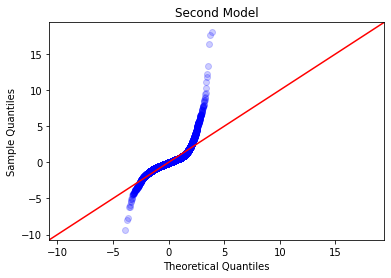

In [54]:
residuals = model_2.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Second Model', size=12);

#### Assumption of Homoscedasticity<br>&emsp;(for Model_2)

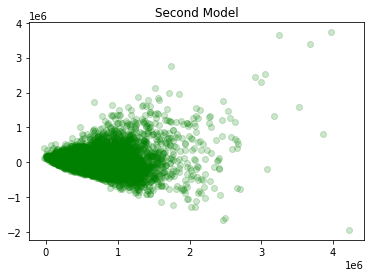

In [55]:
fig1,ax1 = plt.subplots()
ax1.scatter(x=model_2.predict(), y=residuals, color='green', alpha=0.2)
plt.title('Second Model', size=12);

In [56]:
model_2_data.to_csv('C:/Users/PC/Desktop/Moringa_Project1/dsc-phase-2-project/dsc-phase-2-project/data/model_2_data.csv', index=False)